In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float, ForeignKey
from sqlalchemy.orm import sessionmaker, relationship
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [11]:
df = pd.read_csv("blackfridat_rename.csv")

In [12]:
df.insert(0, 'new_id', range(1, 1+ len(df)))
df

,new_id,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1,1004023,P00000142,F,36-45,9,C,1,1,3,4.0,5.0,8390
1,2,1000876,P00114342,M,26-35,4,B,1,0,1,8.0,17.0,15496
2,3,1005365,P00053842,M,18-25,12,C,0,0,4,5.0,12.0,2138
3,4,1000285,P00108542,F,36-45,0,A,1,0,5,8.0,14.0,8663
4,5,1001373,P00196042,F,26-35,1,A,1,0,4,9.0,15.0,2846
5,6,1003075,P00057742,F,26-35,11,C,2,1,2,8.0,18.0,13318
6,7,1003641,P00046742,M,26-35,0,B,1,0,1,2.0,15.0,15455
7,8,1004004,P00063342,M,51-55,0,C,1,1,1,2.0,9.0,15628
8,9,1000245,P00066542,M,36-45,16,B,0,0,1,15.0,16.0,4031
9,10,1003399,P00243942,M,26-35,4,C,1,0,1,2.0,15.0,11979


In [13]:
# Create Engine
engine = create_engine("sqlite:///blackfriday.sqlite")

In [14]:
# df.set_index('new_id',inplace = False)

In [15]:
df.head()

,new_id,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1,1004023,P00000142,F,36-45,9,C,1,1,3,4.0,5.0,8390
1,2,1000876,P00114342,M,26-35,4,B,1,0,1,8.0,17.0,15496
2,3,1005365,P00053842,M,18-25,12,C,0,0,4,5.0,12.0,2138
3,4,1000285,P00108542,F,36-45,0,A,1,0,5,8.0,14.0,8663
4,5,1001373,P00196042,F,26-35,1,A,1,0,4,9.0,15.0,2846


Text(0.5, 0.98, 'who is dominant female customers / male customers')

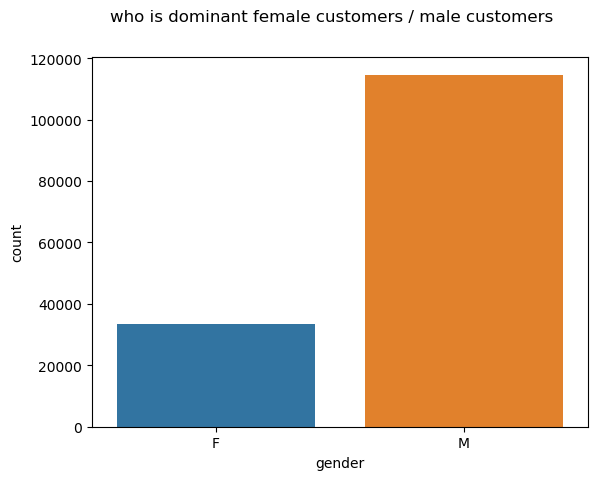

In [16]:
#is it true that female customers are highly dominant in comparison to male customers?
sns.countplot(df['gender'])
#plt.subplot(df['gender'])
plt.suptitle('who is dominant female customers / male customers')

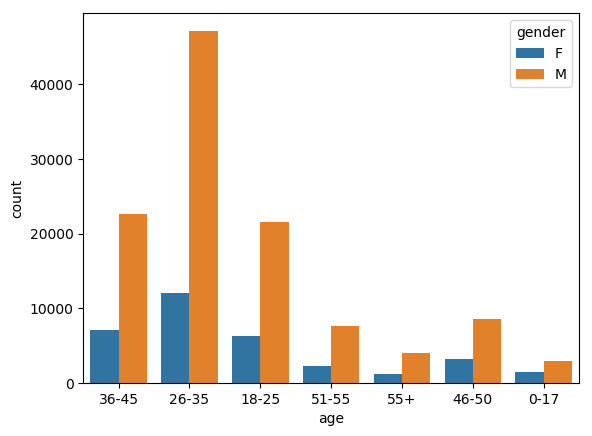

In [17]:
#distribution of gender variable, but taking into consideration the Age category(with defined hue parameter.)
sns.countplot(df['age'], hue=df['gender'])

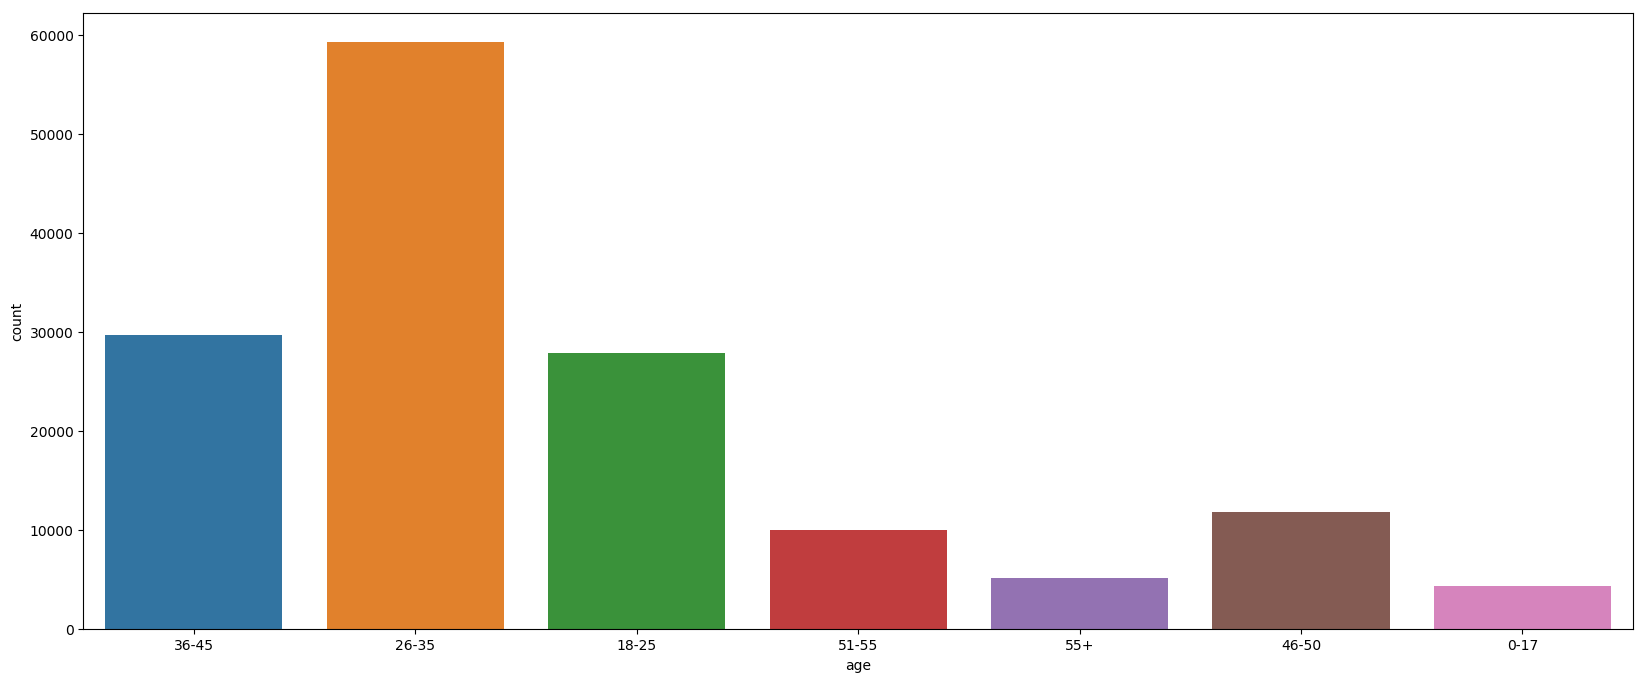

In [18]:
age_data_frame = df.copy()
# Number of purchase records by age.
plt.figure(figsize = (20,8))
sns.countplot(age_data_frame["age"])

In [19]:
df.describe()

,new_id,user_id,occupation,marital_status,product_category_1,product_category_2,product_category_3,purchase
count,147936.000000,1.479360e+05,147936.000000,147936.000000,147936.000000,147936.000000,147936.000000,147936.000000
mean,73968.500000,1.002999e+06,8.173494,0.402485,2.741760,6.894238,12.668248,11662.194327
std,42705.589049,1.720083e+03,6.484549,0.490400,2.573621,4.497650,4.125134,5083.023824
min,1.000000,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,36984.750000,1.001498e+06,2.000000,0.000000,1.000000,2.000000,9.000000,7871.000000
50%,73968.500000,1.003051e+06,7.000000,0.000000,1.000000,6.000000,14.000000,11757.000000
75%,110952.250000,1.004415e+06,14.000000,1.000000,4.000000,10.000000,16.000000,15627.000000
max,147936.000000,1.006040e+06,20.000000,1.000000,15.000000,16.000000,18.000000,23959.000000


In [20]:
# how many different products are sold
df['product_id'].nunique()

526

In [21]:
# how many different customers have bought something from the store
df['user_id'].nunique()

5854

In [22]:
# occupation type of each customer.
#  create the function to extract all different occupations
def unique(column):
    x = np.array(column)
    print(np.unique(x))
print("The unique ID numbers of customers occupations:")
unique(df['occupation'])

The unique ID numbers of customers occupations:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [23]:
#how much money each costumer group (grouped by occupation ID) spent.
age= list(range(0, 7))
spent_money = []
for oid in age:
    spent_money.append(df[df['age'] == oid]['purchase'].sum())

spent_money

[0, 0, 0, 0, 0, 0, 0]

In [25]:
# how many different cities 
df['city_category'].nunique()

3

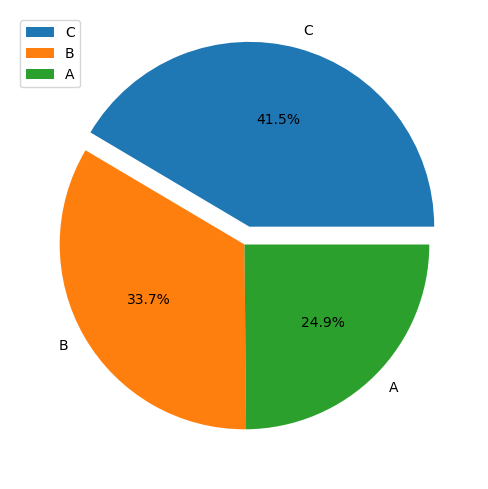

In [26]:
# what is the ratio of customers from each city.
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(df['city_category'].value_counts(), explode=explode, labels=df['city_category'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

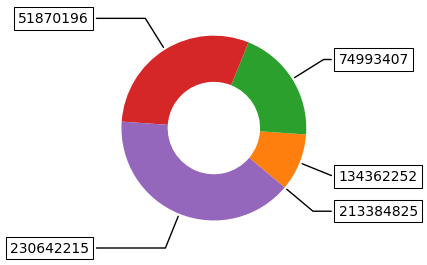

In [27]:
#Donut chart to display the most popular languages
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = list(range(0, 5))
#occupations_id = list(range(0, 21))
#data = ['0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20']
#skill = [36-45,26-35,18-25,51-55]
skill = [213384825, 134362252, 74993407, 51870196, 230642215]
#, 40980298, 60996124]
#, 187550876, 5816512, 18388543, 43166614]
 #33660030,
 #112705223,
 #21428037,
 #88969298,
 #42144742,
 #76906735,
 #151563365,
 #21144033,
 #23752448,
# 90832607]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.75)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(skill[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Most Desired Languages in the United States")

# Save an image of the chart and print it to the screen
#plt.savefig("Images/most_desired_skills.png")
plt.show()

In [28]:
product_age_df = df[['product_id', 'age', 'purchase']].groupby(['age', 'product_id']).count()
product_age_df = product_age_df.sort_values(['purchase'], ascending=False).reset_index()
product_age_df.head()

,age,product_id,purchase
0,26-35,P00110742,564
1,26-35,P00112142,539
2,26-35,P00057642,527
3,26-35,P00025442,521
4,26-35,P00184942,518


In [29]:
# Unique number of users by age range.
age_data_frame = df.groupby('age')['user_id'].nunique()
age_data_frame

age
0-17      216
18-25    1066
26-35    2042
36-45    1164
46-50     523
51-55     478
55+       365
Name: user_id, dtype: int64

In [30]:
occupation_df = df.copy()

In [31]:
# Number of users per occupation.
users_in_occupation = occupation_df.groupby('occupation')['user_id'].nunique()
users_in_occupation.sort_values(ascending=False)

occupation
4     740
0     680
7     664
1     512
17    491
12    373
14    292
20    271
2     255
16    234
6     226
10    191
3     168
15    139
13    138
11    127
5     111
9      88
19     71
18     66
8      17
Name: user_id, dtype: int64

In [32]:
# The amount of purchases, the total dollars collected and the average purchase per occupation.
occupation_purchases = occupation_df.groupby('occupation')['purchase'].agg(['sum', 'count', 'mean'])
occupation_purchases.sort_values('sum', ascending=False)

,sum,count,mean
occupation,,,
4,230642215,19889,11596.471165
0,213384825,18603,11470.452346
7,187550876,15788,11879.330884
17,151563365,12468,12156.189044
1,134362252,11983,11212.739047
12,112705223,9299,12120.144424
20,90832607,8140,11158.796929
14,88969298,7411,12005.032789
16,76906735,6488,11853.689118


In [33]:
# Number of users who bought by occupation and city.
users_in_occupation = occupation_df.groupby(['occupation', 'city_category'])['user_id'].nunique()
users_in_occupation

occupation  city_category
0           A                128
            B                202
            C                350
1           A                 94
            B                139
            C                279
2           A                 68
            B                 80
            C                107
3           A                 34
            B                 46
            C                 88
4           A                172
            B                236
            C                332
5           A                 14
            B                 40
            C                 57
6           A                 24
            B                 74
            C                128
7           A                111
            B                168
            C                385
8           A                  4
            B                  2
            C                 11
9           A                  7
            B                 25
            C    

In [34]:
# Number of records per occupation
df["occupation"].value_counts()

4     19889
0     18603
7     15788
17    12468
1     11983
12     9299
20     8140
14     7411
2      6627
16     6488
6      5168
3      4472
10     3850
15     3512
5      3456
11     2882
19     2143
13     1809
18     1786
9      1675
8       487
Name: occupation, dtype: int64

In [35]:
occupation_df.drop(['user_id', 'marital_status', 'product_category_2', 'product_category_3', 'stay_in_current_city_years', 'product_id', 'city_category'], axis=1, inplace=True)
occupation_df = occupation_df.groupby(["occupation", "product_category_1"]).sum().reset_index()
occupation_df

,occupation,product_category_1,new_id,purchase
0,0,1,749908356,136468539
1,0,2,131822012,20081098
2,0,3,108022372,14847095
3,0,4,44163027,1502992
4,0,5,158740946,13826191
5,0,6,68740222,14105077
6,0,8,67783179,7235255
7,0,10,15789041,3864846
8,0,11,19907616,1096821
9,0,12,1050275,19007


<Figure size 2000x800 with 0 Axes>

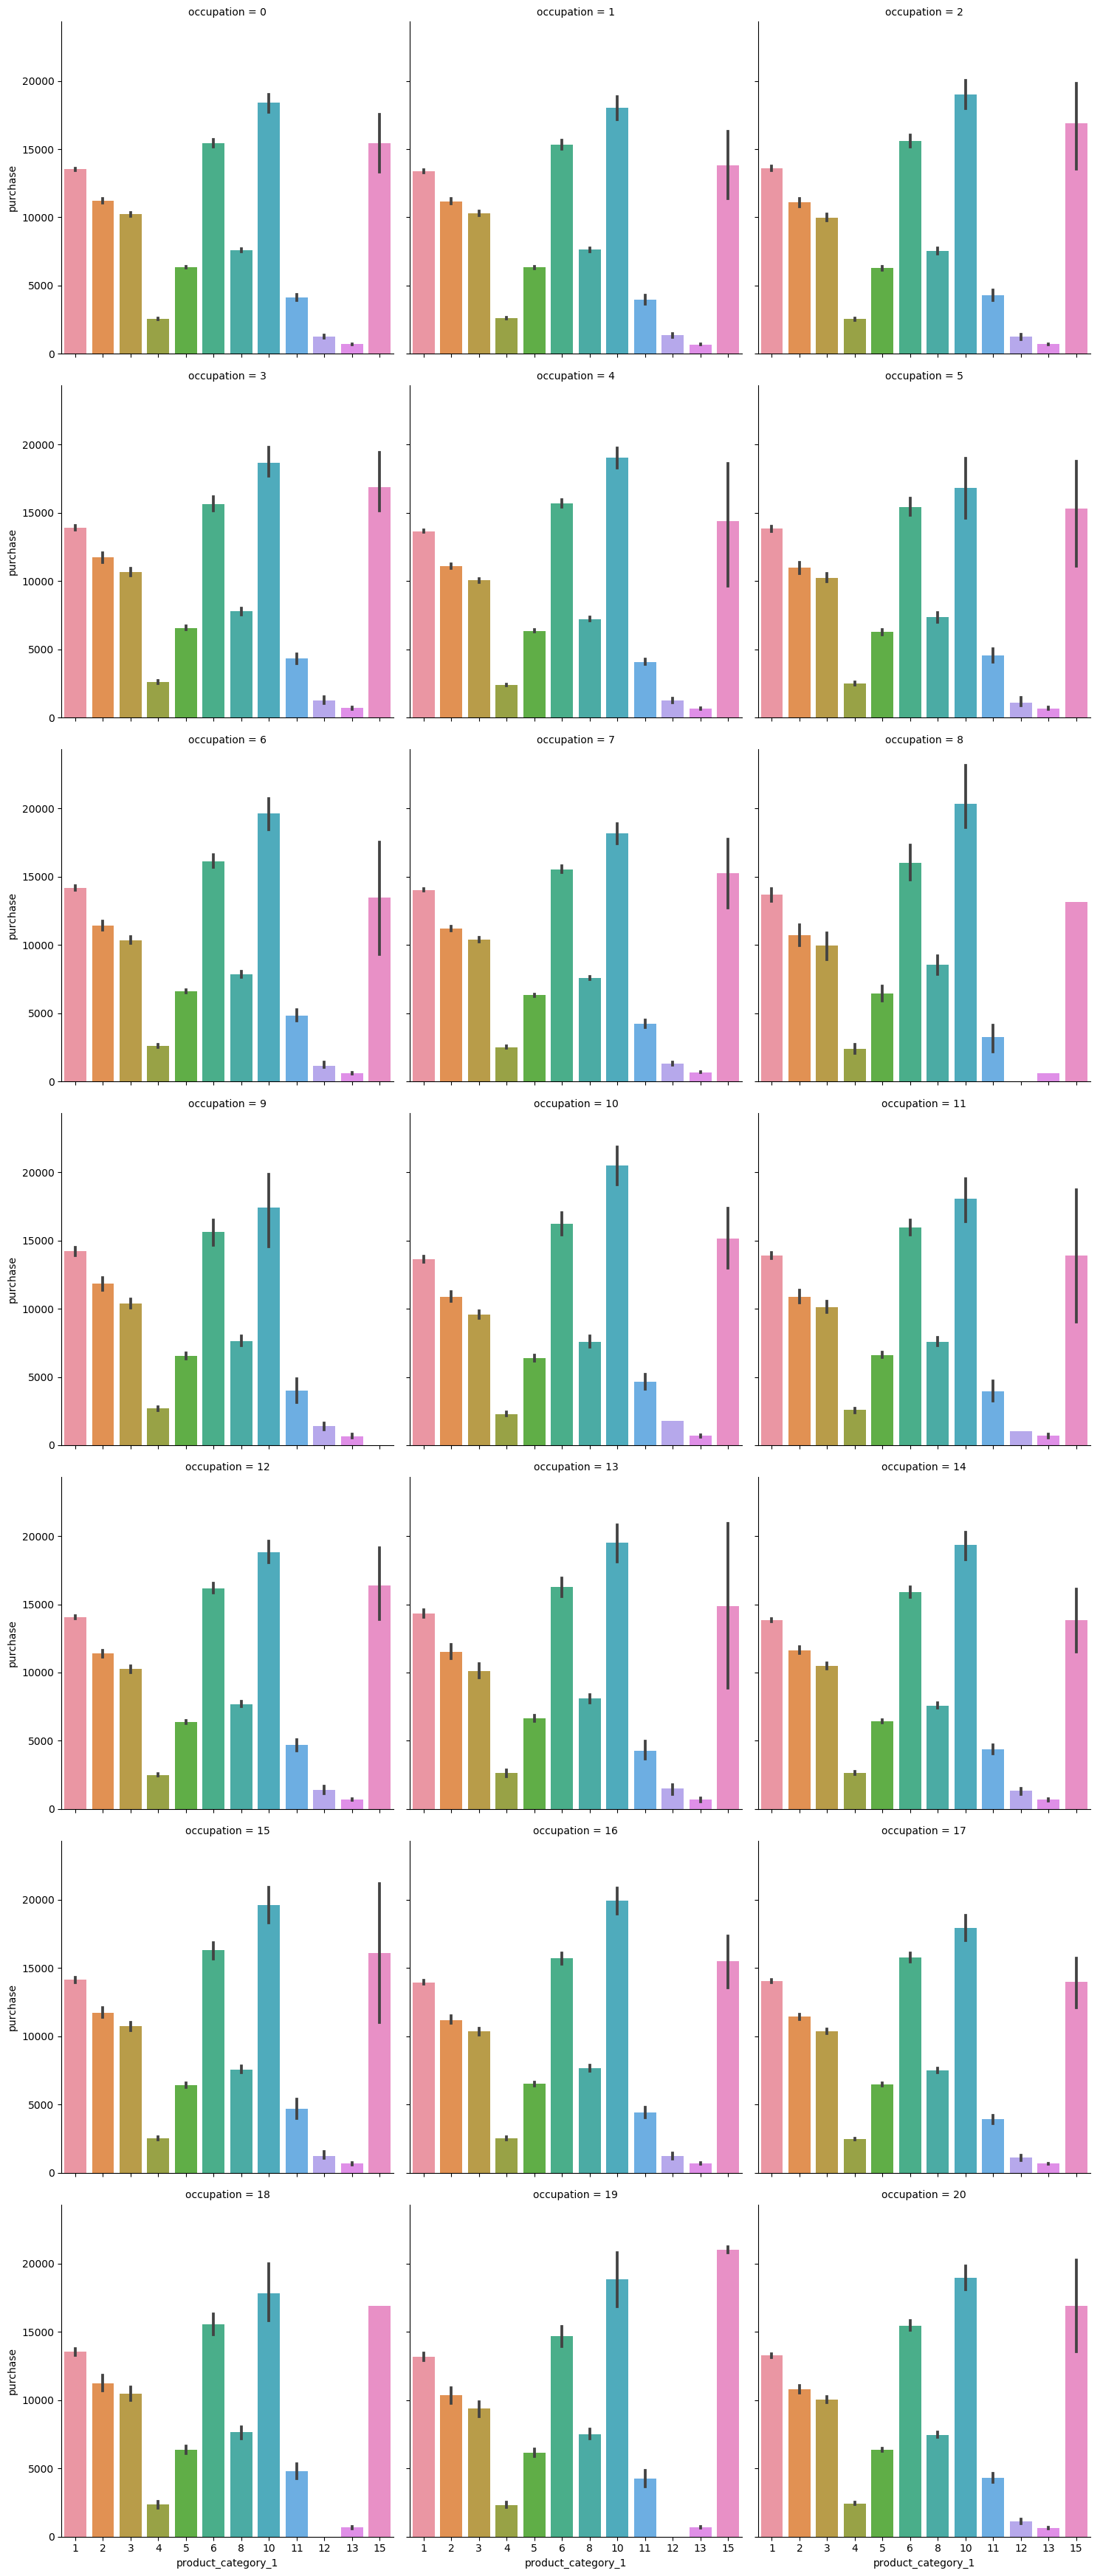

In [36]:
# Amount of money spent per category, per occupation.
plt.figure(figsize = (20,8))
sns.catplot(x='product_category_1', y='purchase', col="occupation", col_wrap=3, data=df, kind="bar")

In [37]:
# city category
city_df = df.copy()

In [38]:
# Quantity of purchases made and amount of money collected by city.
city_purchase = city_df.groupby('city_category')['purchase'].agg(['sum', 'count'])
city_purchase

,sum,count
city_category,,
A,411759365,36785
B,705402272,61367
C,608096743,49784


In [39]:
city_user = city_df.groupby('city_category')['user_id'].nunique()
city_user

city_category
A    1041
B    1699
C    3114
Name: user_id, dtype: int64

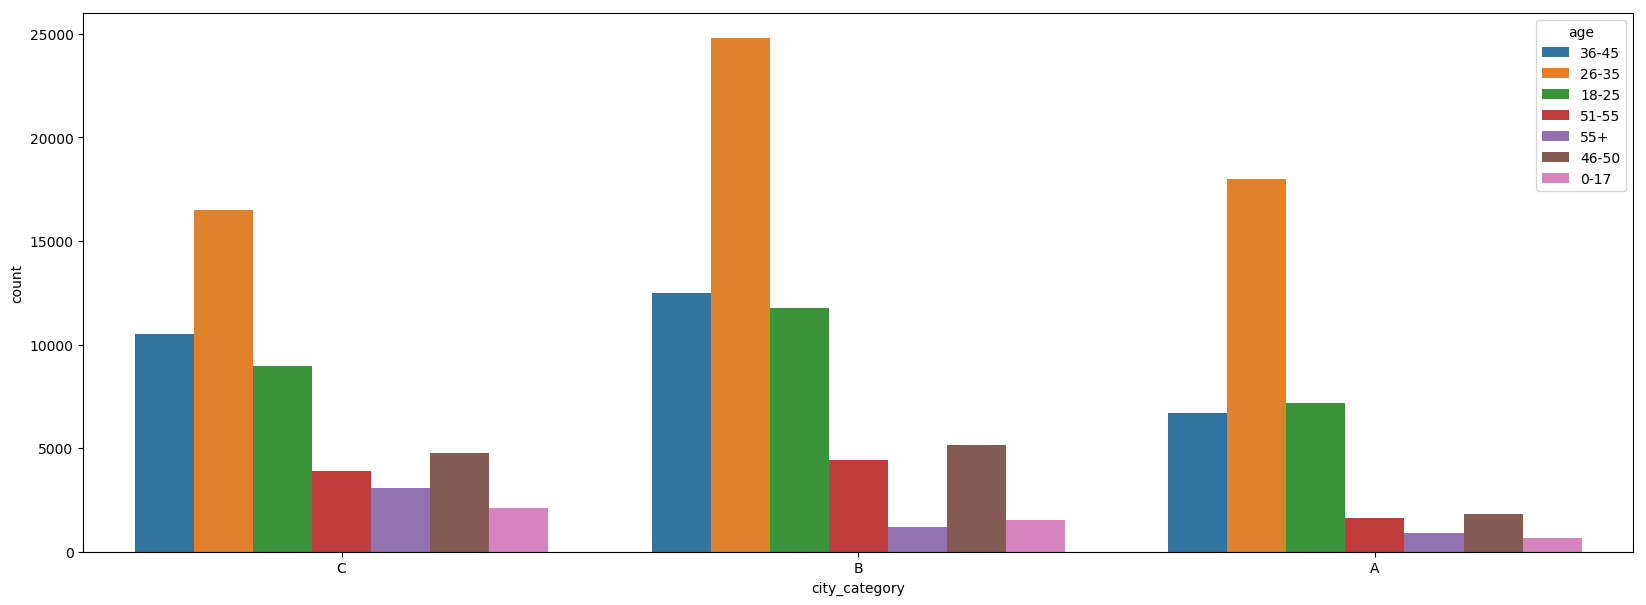

In [40]:
# Total number of purchases by age and city
fig1, ax1 = plt.subplots(figsize = (20, 7))
sns.countplot(df['city_category'], hue = df["age"])

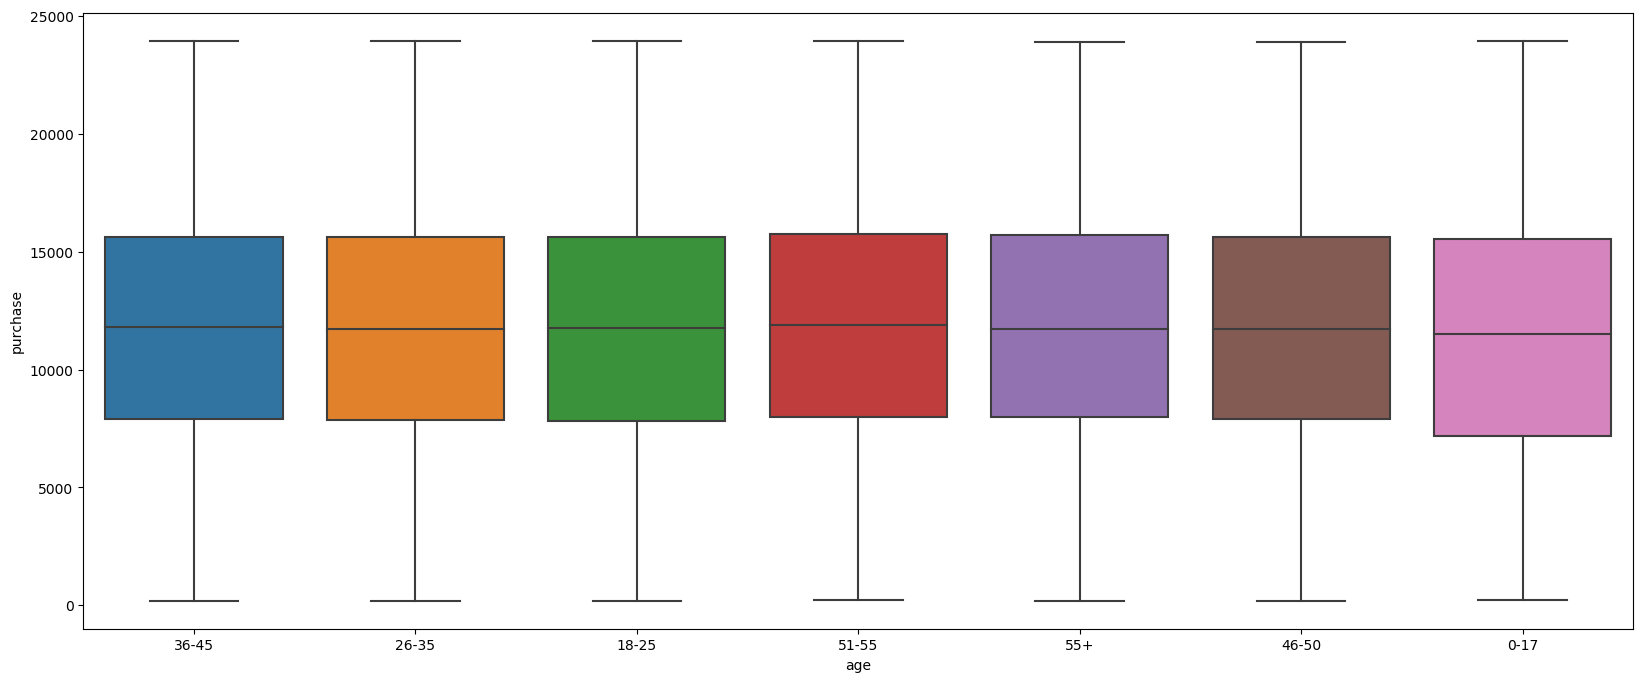

In [41]:
# Regardless of age, the amount of money spent remains constant.
plt.figure(figsize = (20,8))
sns.boxplot('age','purchase', data = df)
plt.show()

In [42]:
# Product Category
product_category_df = df.copy()
product_category_df['product_category_2'].fillna(-1, inplace=True)
product_category_df['product_category_3'].fillna(-1, inplace=True)
product_category_df["product_category_2"] = product_category_df["product_category_2"].astype(np.int64)
product_category_df["product_category_3"] = product_category_df["product_category_3"].astype(np.int64)
product_category_df.drop(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category', 'stay_in_current_city_years', 'marital_status', 'stay_in_current_city_years'], axis=1, inplace=True)
product_category_df.sort_values(["product_category_1", "product_category_2", "product_category_3"], inplace=True)
product_category_df.head(15000)

,new_id,product_category_1,product_category_2,product_category_3,purchase
197,198,1,2,3,19029
628,629,1,2,3,11443
1193,1194,1,2,3,8167
2566,2567,1,2,3,7765
3077,3078,1,2,3,8013
3232,3233,1,2,3,19057
3673,3674,1,2,3,15329
4532,4533,1,2,3,19280
4566,4567,1,2,3,11722
4929,4930,1,2,3,19379


new_id                        0
user_id                       0
product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
purchase                      0
dtype: int64

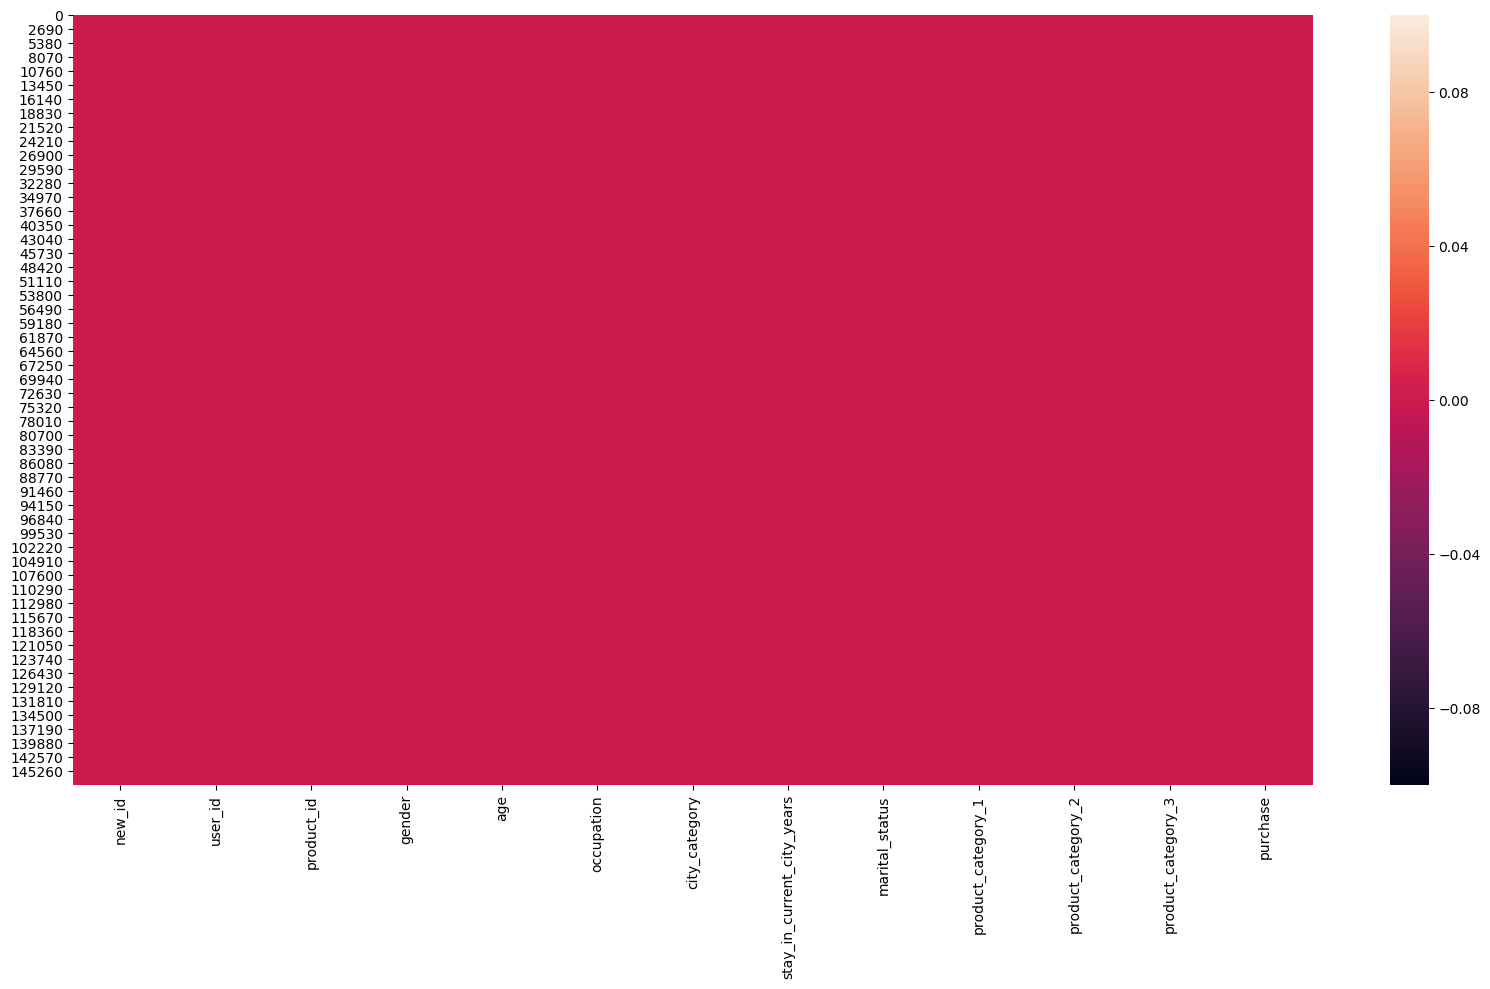

In [45]:
plt.figure(figsize = (20,10))
sns.heatmap(df.isnull(), cbar=True)
df.isnull().sum()

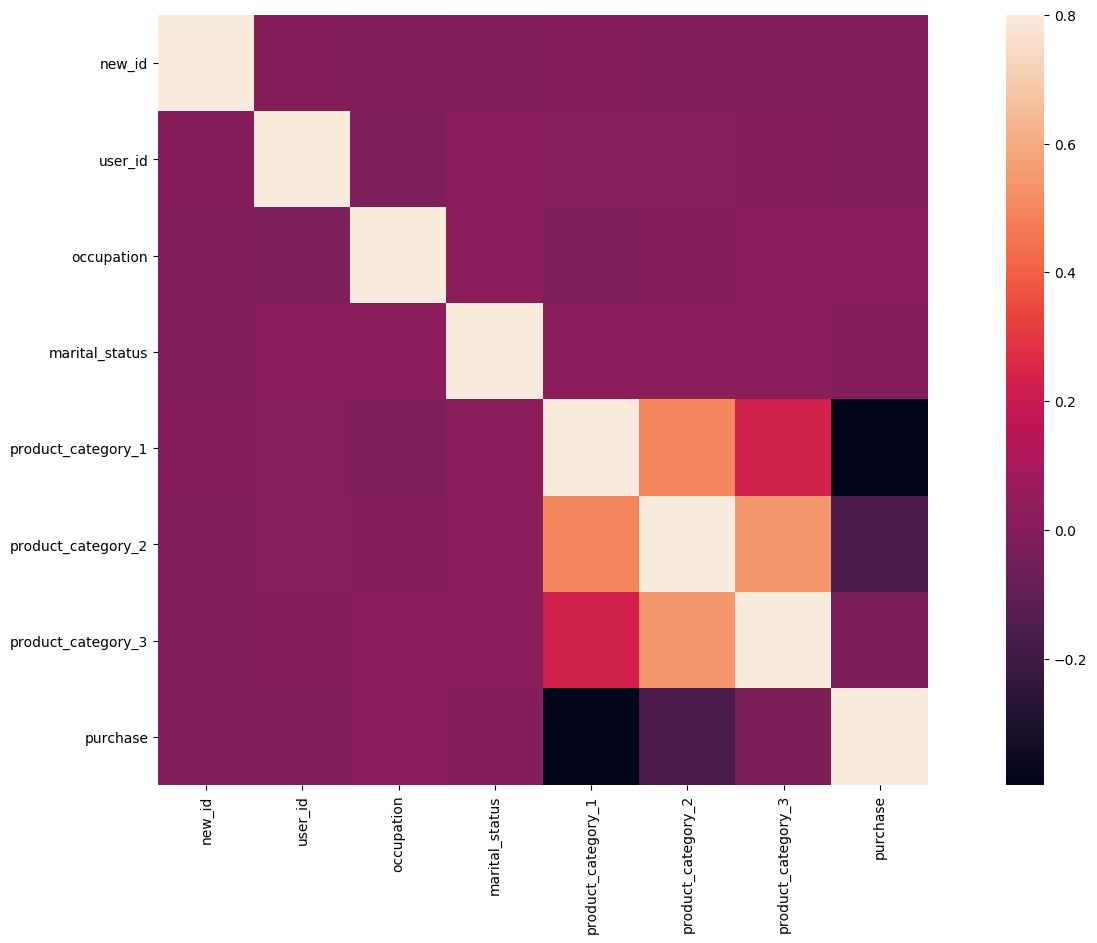

In [46]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize = (20,10))
sns.heatmap(corrmat, vmax=.8, square=True)

We can see how age and marital status are quite related things, which is something very normal.

But we can also see some relation between the categories. Relationship between category 1:      - 2 is very strong      - 3 is very good too

Relationship between category 2 and 3 is quite good as well, in fact more than the relationship between category 1 and 2.

We can say that these relationships tell us that depending on the category you buy, users will normally repeat the categories.

We could work with a classifier or some type of algorithm to predict what category you are going to buy from the one you have already chosen.

In the near future, we can use the aPriori algorithm to better work with the categories and get a better understanding of the relation between one and other. 

Corrmat will explain the correlation between two columns or categories

In [ ]:
# Declare the base
Base = declarative_base()

In [ ]:
df.columns

In [ ]:
# pd.to_numeric(df.stay_in_current_city_years)

In [ ]:
df.info()

In [ ]:
# df.stay_in_current_city_years

In [ ]:
# Define ORM 
# Define the ORM class for `BlackFriday`
### BEGIN SOLUTION
class Blackfriday(Base):
    
    __tablename__ = 'blackfriday'
    new_id = Column(Integer, primary_key=True)
    user_id = Column(Integer)
    product_id = Column(Text)
    gender = Column(Text)
    age = Column(Text)
    occupation = Column(Integer)
    city_category = Column(Text)
    stay_in_current_city_years = Column(Text)
    marital_status = Column(Integer)
    product_category_1 = Column(Integer)
    product_category_2 = Column(Float)
    product_category_3 = Column(Float)
    purchase = Column(Integer)
    
    def __repr__(self):
        return f"id={self.new_id}"

In [ ]:
# Use Create all to crate the table 
Base.metadata.create_all(engine)

In [ ]:
# Verify the table name exists in db
engine.table_names()

In [ ]:
conn = engine.connect()

In [ ]:
# load csv 
csv_df = df

In [ ]:
# orient records does creates a list of data to write
data = csv_df.to_dict(orient='records')

In [ ]:
data

In [ ]:
# delete all rows in the table -- Optional
#conn.execute(blackfriday.delete())

In [ ]:
# delete all rows in the table -- Optional
conn.execute(Blackfriday.__table__.delete())

In [ ]:
# insert df into db as bulk
conn.execute(Blackfriday.__table__.insert(),data)

In [ ]:
# insert csv into db tabel
def populate_table(engine,table,csvfile):
    # connect
    conn = engine.connect()    
    

In [ ]:
# Use a basic query to validate that the data was inserted correctly for table `measurement`
### BEGIN SOLUTION
engine.execute("SELECT * FROM blackfriday LIMIT 1").fetchall()
### END SOLUTION

In [ ]:
sel = Session.query["SELECT age,occupation,purchase FROM blackfriday LIMIT 10"]
sel

In [ ]:
# Create our session (link) from Python to the DB
session = Session(engine)
